# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [8]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [9]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 200
x_size = 68
y_size = 68
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 40001
batch = 16

In [10]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
# generator.add(Conv2D(1, kernel_size=5, padding='same', activation='relu'))
# generator.add(Conv2D(1, kernel_size=5, padding='same', activation='elu'))
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 36992)             7435392   
_________________________________________________________________
batch_normalization_2 (Batch (None, 36992)             147968    
_________________________________________________________________
reshape_1 (Reshape)          (None, 17, 17, 128)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        204864    
_________________________________________________________________
batch_normalization_3 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 34, 34, 64)       

In [11]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 34, 34, 64)        1664      
_________________________________________________________________
activation_4 (Activation)    (None, 34, 34, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 128)       204928    
_________________________________________________________________
activation_5 (Activation)    (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [12]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 68, 68, 1)         7790081   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 243585    
Total params: 8,033,666
Trainable params: 7,715,969
Non-trainable params: 317,697
_________________________________________________________________


In [13]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2331, 68, 68)


(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)


(2331, 68, 68)

In [14]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 68, 68)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.18890941 / -80.0

  scale = MaxAbsScaler()
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4624)
  print(np.max(X_train), np.min(X_train))   # 48.270073 -1.1008358


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 68, 68, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan10.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            idx2 = np.random.randint(0, gen_imgs.shape[0])
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 68, 68, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            print(gen_mels.shape) # (862, 128)
            gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan10\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
          

gan_train(epochs, batch, 100)

end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

7  d_loss:0.0033  g_loss:9.6857
epoch:39538  d_loss:0.1376  g_loss:10.8488
epoch:39539  d_loss:0.0026  g_loss:8.5294
epoch:39540  d_loss:0.1206  g_loss:9.0270
epoch:39541  d_loss:0.0080  g_loss:8.1578
epoch:39542  d_loss:0.0086  g_loss:9.9076
epoch:39543  d_loss:0.0144  g_loss:11.7567
epoch:39544  d_loss:0.1162  g_loss:8.2309
epoch:39545  d_loss:0.0482  g_loss:7.4338
epoch:39546  d_loss:0.0028  g_loss:9.1080
epoch:39547  d_loss:0.0244  g_loss:9.6940
epoch:39548  d_loss:0.0079  g_loss:9.3937
epoch:39549  d_loss:0.0814  g_loss:11.5983
epoch:39550  d_loss:0.0076  g_loss:8.7693
epoch:39551  d_loss:0.3645  g_loss:5.6283
epoch:39552  d_loss:0.1851  g_loss:8.0948
epoch:39553  d_loss:0.0974  g_loss:10.5173
epoch:39554  d_loss:0.0019  g_loss:12.7095
epoch:39555  d_loss:0.1521  g_loss:14.6427
epoch:39556  d_loss:0.2887  g_loss:9.0338
epoch:39557  d_loss:0.0354  g_loss:6.4276
epoch:39558  d_loss:0.0737  g_loss:7.0615
epoch:39559  d_loss:0.1812  g_loss:9.5942
epoch:39560  d_loss:0.1047  g_loss:9.7

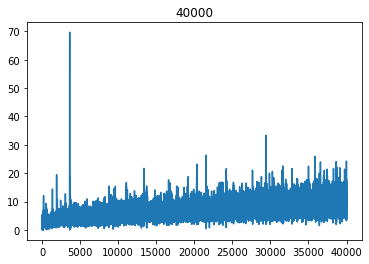

In [15]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan10.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

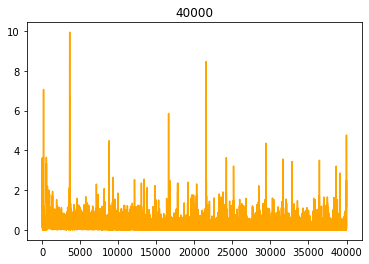

In [16]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()